In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import auc, roc_curve, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [2]:
df1 = pd.read_csv('data/data_original/DatosCompartidos202401.csv', encoding='latin1', sep=';')
df2 = pd.read_csv('data/data_original/DatosCompartido202402.csv', encoding='latin1', sep=';')
df = pd.concat([df1, df2], axis=0)
df.shape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123850 entries, 0 to 562467
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fechacorte           1123849 non-null  object 
 1   IdNroServicio        1123850 non-null  object 
 2   NombreNroServicio    1123850 non-null  object 
 3   Direccion            1123842 non-null  object 
 4   IdTipoIdentidad      1123842 non-null  object 
 5   NroIdentidad         1123841 non-null  object 
 6   IdEmpresa            1123840 non-null  object 
 7   NombreEmpresa        1123840 non-null  object 
 8   IdUUNN               1123840 non-null  float64
 9   nombreunidadnegocio  1123839 non-null  object 
 10  Periodo              1123838 non-null  object 
 11  Tarifa               1123837 non-null  object 
 12  Departamento         1123837 non-null  object 
 13  Provincia            1123837 non-null  object 
 14  Distrito             1123836 non-null  object 
 15 

In [4]:
df.isna().sum() /df.shape[0]

fechacorte             8.897985e-07
IdNroServicio          0.000000e+00
NombreNroServicio      0.000000e+00
Direccion              7.118388e-06
IdTipoIdentidad        7.118388e-06
NroIdentidad           8.008186e-06
IdEmpresa              8.897985e-06
NombreEmpresa          8.897985e-06
IdUUNN                 8.897985e-06
nombreunidadnegocio    9.787783e-06
Periodo                1.067758e-05
Tarifa                 1.156738e-05
Departamento           1.156738e-05
Provincia              1.156738e-05
Distrito               1.245718e-05
Ubigeo                 1.245718e-05
idTipoDocumento        1.245718e-05
NroDocumento           1.245718e-05
Cartera                1.423678e-05
FechaVencimiento       1.423678e-05
FechaEmision           1.423678e-05
FechaConsumoDesde      1.423678e-05
FechaConsumoHasta      1.423678e-05
Importe                1.423678e-05
ConsumosCalculados     1.423678e-05
dtype: float64

In [5]:
df = df.dropna()
df.shape

(1123834, 25)

In [6]:
df['fechacorte'] = df['fechacorte'].astype(int)
df['IdNroServicio'] = df['IdNroServicio'].astype(int)
df['IdTipoIdentidad'] = df['IdTipoIdentidad'].astype(str)
# anonimizado df['NroIdentidad'] = df['NroIdentidad'].astype(int64)
df['IdEmpresa'] = df['IdEmpresa'].astype(int)
df['IdUUNN'] = df['IdUUNN'].astype(str)
df['Periodo'] = df['Periodo'].astype(int)
df['Ubigeo'] = df['Ubigeo'].astype(str)
df['idTipoDocumento'] = df['idTipoDocumento'].astype(int)
df['FechaVencimiento'] = df['FechaVencimiento'].astype(int)
df['FechaEmision'] = df['FechaEmision'].astype(int)
df['FechaConsumoDesde'] = df['FechaConsumoDesde'].astype(int)
df['FechaConsumoHasta'] = df['FechaConsumoHasta'].astype(int)

In [7]:
df.head()

,fechacorte,IdNroServicio,NombreNroServicio,Direccion,IdTipoIdentidad,NroIdentidad,IdEmpresa,NombreEmpresa,IdUUNN,nombreunidadnegocio,...,Ubigeo,idTipoDocumento,NroDocumento,Cartera,FechaVencimiento,FechaEmision,FechaConsumoDesde,FechaConsumoHasta,Importe,ConsumosCalculados
0,20240131,0,GXXXXXXXXXXXXXz,JXXXXXXXXXXXXX,1,XXXXXXXX,1,Electronoroeste S.A.,4.0,Alto Piura,...,200401.0,7,S012-07754799,C,20240215,20240129,20231223,20240123,190.3,168.0
1,20240131,0,SXXXXXXXXXXXXXS,JXXXXXXXXXXXXX,7,XXXXXXXX,1,Electronoroeste S.A.,4.0,Alto Piura,...,200401.0,7,S012-07754816,C,20240215,20240129,20231223,20240123,12.4,6.0
2,20240131,0,BXXXXXXXXXXXXXO,JXXXXXXXXXXXXX,1,XXXXXXXX,1,Electronoroeste S.A.,4.0,Alto Piura,...,200401.0,7,S012-07754823,C,20240215,20240129,20231223,20240123,11.4,13.0
3,20240131,0,AXXXXXXXXXXXXXA,JXXXXXXXXXXXXXo,7,XXXXXXXX,1,Electronoroeste S.A.,4.0,Alto Piura,...,200401.0,7,S012-07754843,C,20240215,20240129,20231223,20240123,53.5,63.0
4,20240131,0,OXXXXXXXXXXXXXs,JXXXXXXXXXXXXXs,1,XXXXXXXX,1,Electronoroeste S.A.,4.0,Alto Piura,...,200401.0,7,S012-07754864,C,20240215,20240129,20231223,20240123,42.6,33.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123834 entries, 0 to 562467
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fechacorte           1123834 non-null  int64  
 1   IdNroServicio        1123834 non-null  int64  
 2   NombreNroServicio    1123834 non-null  object 
 3   Direccion            1123834 non-null  object 
 4   IdTipoIdentidad      1123834 non-null  object 
 5   NroIdentidad         1123834 non-null  object 
 6   IdEmpresa            1123834 non-null  int64  
 7   NombreEmpresa        1123834 non-null  object 
 8   IdUUNN               1123834 non-null  object 
 9   nombreunidadnegocio  1123834 non-null  object 
 10  Periodo              1123834 non-null  int64  
 11  Tarifa               1123834 non-null  object 
 12  Departamento         1123834 non-null  object 
 13  Provincia            1123834 non-null  object 
 14  Distrito             1123834 non-null  object 
 15 

In [9]:
numcols = [
    'fechacorte',  
    'IdNroServicio',  
    'IdEmpresa',  
    'Periodo',  
    'idTipoDocumento',  
    'FechaVencimiento',  
    'FechaEmision',  
    'FechaConsumoDesde',  
    'FechaConsumoHasta',  
    'Importe',
    'ConsumosCalculados'
]

In [10]:
for col in numcols:
    print(df[col].nunique(), "\t", col)

2 	 fechacorte
1 	 IdNroServicio
1 	 IdEmpresa
2 	 Periodo
1 	 idTipoDocumento
37 	 FechaVencimiento
34 	 FechaEmision
33 	 FechaConsumoDesde
34 	 FechaConsumoHasta
19463 	 Importe
9795 	 ConsumosCalculados


In [11]:
snumcols = [
    #'FechaVencimiento',  
    #'FechaEmision',  
    #'FechaConsumoDesde',  
    #'FechaConsumoHasta',  
    #'Importe',
    'ConsumosCalculados'
]

In [12]:
objcol =[
    'NombreNroServicio', 
    'Direccion', 
    #'IdTipoIdentidad',  
    'NroIdentidad', 
    'NombreEmpresa', 
    #'IdUUNN',  
    #'nombreunidadnegocio', 
    'Tarifa', 
    'Departamento', 
    'Provincia', 
    'Distrito', 
    'Ubigeo',  
    'NroDocumento', 
    'Cartera'
]

In [13]:
for col in objcol:
    print(df[col].nunique(), "\t", col)

1567 	 NombreNroServicio
633 	 Direccion
1 	 NroIdentidad
1 	 NombreEmpresa
14 	 Tarifa
13 	 Departamento
60 	 Provincia
176 	 Distrito
178 	 Ubigeo
1123834 	 NroDocumento
2 	 Cartera


In [14]:
sobjcol = [
    # 'NombreNroServicio', 
    # 'Direccion', 
    #'IdTipoIdentidad',  
    #'IdUUNN',  
    #'nombreunidadnegocio', 
    'Tarifa', 
    'Departamento', 
    'Provincia', 
    'Distrito', 
    # 'Ubigeo',  
    # 'NroDocumento', 
    'Cartera'
]

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Importe', 'ConsumosCalculados']])
df['cluster'] = kmeans.labels_
df.loc[df['cluster'] != 0, 'cluster'] = 1

/home/dev/miniconda3/envs/envGPU/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df.groupby('cluster').size()

cluster
0    1122627
1       1207
dtype: int64

In [17]:
agg_functions = {
    'Importe': 'median',  # Promedio de valor1
    'ConsumosCalculados': 'median',  # Promedio de valor2
    'Departamento': lambda x: x.mode()[0],  # Moda de categoria
    'Provincia': lambda x: x.mode()[0],  # Moda de categoria
    'Distrito': lambda x: x.mode()[0],  # Moda de categoria
    'Tarifa': lambda x: x.mode()[0],  # Moda de categoria
}

df.groupby('cluster').agg(agg_functions).reset_index()

,cluster,Importe,ConsumosCalculados,Departamento,Provincia,Distrito,Tarifa
0,0,47.7,53.0,Piura,Piura,Piura,BT5B
1,1,13650.5,20448.0,Piura,Piura,Piura,MT3


In [18]:
df = df.loc[df.cluster == 0,:] 

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Importe', 'ConsumosCalculados']])
df['cluster'] = kmeans.labels_

/home/dev/miniconda3/envs/envGPU/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df.groupby('cluster').size()

cluster
0    972580
1      3401
2      9501
3      1192
4    135953
dtype: int64

In [21]:
df.groupby('cluster').agg(agg_functions).reset_index()

,cluster,Importe,ConsumosCalculados,Departamento,Provincia,Distrito,Tarifa
0,0,37.70,41.000,Piura,Piura,Piura,BT5B
1,1,2842.40,3239.000,Piura,Piura,Piura,BT5B
2,2,1158.50,1211.000,Piura,Piura,Piura,BT5B
3,3,5501.85,6757.568,Piura,Piura,Piura,BT5B
4,4,224.10,224.000,Piura,Piura,Piura,BT5B


In [22]:
X = df[[
    'Importe',
    'ConsumosCalculados',
    'cluster'
]]

IdTipoIdentidad_encoder = LabelEncoder()
IdUUNN_encoder = LabelEncoder()
nombreunidadnegocio_encoder = LabelEncoder()
Tarifa_encoder = LabelEncoder()
Departamento_encoder = LabelEncoder()
Provincia_encoder = LabelEncoder()
Distrito_encoder = LabelEncoder()
Cartera_encoder = LabelEncoder()

#X.loc[:,'IdTipoIdentidad']= IdTipoIdentidad_encoder.fit_transform(df['IdTipoIdentidad'])
#X.loc[:,'IdUUNN']= IdUUNN_encoder.fit_transform(df['IdUUNN'])
#X.loc[:,'nombreunidadnegocio']= nombreunidadnegocio_encoder.fit_transform(df['nombreunidadnegocio'])
X.loc[:,'Tarifa']= Tarifa_encoder.fit_transform(df['Tarifa'])
X.loc[:,'Departamento']= Departamento_encoder.fit_transform(df['Departamento'])
X.loc[:,'Provincia']= Provincia_encoder.fit_transform(df['Provincia'])
X.loc[:,'Distrito']= Distrito_encoder.fit_transform(df['Distrito'])
X.loc[:,'Cartera']= Cartera_encoder.fit_transform(df['Cartera'])
#_obj = LabelEncoder().fit_transform(X_obj)


/tmp/ipykernel_761/2437733808.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Tarifa']= Tarifa_encoder.fit_transform(df['Tarifa'])
/tmp/ipykernel_761/2437733808.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Departamento']= Departamento_encoder.fit_transform(df['Departamento'])
/tmp/ipykernel_761/2437733808.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [23]:
Tarifa_encoder.classes_
Departamento_encoder.classes_
Provincia_encoder.classes_
Distrito_encoder.classes_
Cartera_encoder.classes_

array(['C', 'M'], dtype=object)

In [24]:
Tarifa_encoder.classes_

array(['BT2', 'BT3', 'BT4', 'BT5A', 'BT5B', 'BT5C', 'BT5D', 'BT5E', 'BT6',
       'BT8', 'MT2', 'MT3', 'MT4'], dtype=object)

In [25]:
def create_csv_encoder(encoder, filename):
    df = pd.DataFrame(encoder.classes_, columns=['key'])
    df['value'] = df.index 
    df.to_csv(f'data/encoder/{filename}', index=False)

In [26]:
create_csv_encoder(Tarifa_encoder, 'Tarifa.csv')
create_csv_encoder(Departamento_encoder, 'Departamento.csv')
create_csv_encoder(Provincia_encoder, 'Provincia.csv')
create_csv_encoder(Distrito_encoder, 'Distrito.csv')
create_csv_encoder(Cartera_encoder, 'Cartera.csv')



In [27]:
X.loc[X['cluster'] != 0, 'cluster'] = 1

In [34]:
from imblearn.over_sampling import SMOTE

X, y = X.drop('cluster', axis=1), X['cluster']
X_balanced,y = SMOTE(random_state=42).fit_resample(X, y)

X = pd.DataFrame(X_balanced, columns=X.columns)
y = pd.Series(y)
y.name = 'cluster'
X = pd.concat([X, y], axis=1)



ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/home/dev/miniconda3/envs/envGPU/lib/python3.10/site-packages/imblearn/utils/_validation.py)

In [ ]:
X['cluster'].value_counts()

In [28]:
X.to_csv('data_v2.csv', sep=';', index=False)

## Random Forest

In [29]:
df = pd.read_csv('data_v2.csv', sep=';')
df.loc[df['cluster'] != 0, 'cluster'] = 1
df.shape

(1122627, 8)

In [30]:
df.head()

,Importe,ConsumosCalculados,cluster,Tarifa,Departamento,Provincia,Distrito,Cartera
0,190.3,168.0,1,4,11,38,32,0
1,12.4,6.0,0,4,11,38,32,0
2,11.4,13.0,0,4,11,38,32,0
3,53.5,63.0,0,4,11,38,32,0
4,42.6,33.0,0,4,11,38,32,0


In [31]:
#df = df.drop(['Importe', 'ConsumosCalculados', 'Departamento', 'Provincia', 'Tarifa', "Cartera", "Distrito"], axis=1)
df = df.drop(['Importe'], axis=1)

<Axes: >

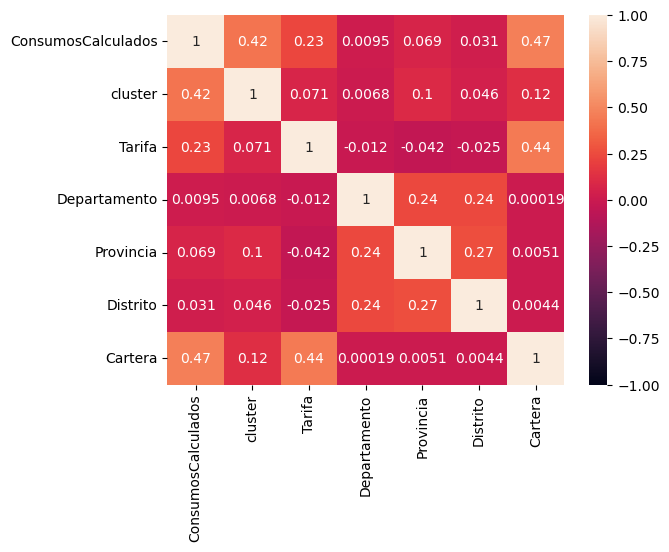

In [32]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)

In [33]:
df.corr()['cluster'].sort_values(ascending=False)[1:]

ConsumosCalculados    0.419673
Cartera               0.121864
Provincia             0.101055
Tarifa                0.070990
Distrito              0.045868
Departamento          0.006809
Name: cluster, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122627 entries, 0 to 1122626
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ConsumosCalculados  1122627 non-null  float64
 1   cluster             1122627 non-null  int64  
 2   Tarifa              1122627 non-null  int64  
 3   Departamento        1122627 non-null  int64  
 4   Provincia           1122627 non-null  int64  
 5   Distrito            1122627 non-null  int64  
 6   Cartera             1122627 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 60.0 MB


In [35]:
agg_functions = {
    #"IdTipoIdentidad": lambda x: x.mode()[0],      
    "Cartera":       lambda x: x.mode()[0],
    "Provincia" :    lambda x: x.mode()[0],             
    #"nombreunidadnegocio": lambda x: x.mode()[0],   
    "Tarifa":       lambda x: x.mode()[0],
    "Distrito":          lambda x: x.mode()[0],    
    "Departamento":    lambda x: x.mode()[0],      
    #"IdUUNN": lambda x: x.mode()[0],
}

df.groupby('cluster').agg(agg_functions).reset_index()

,cluster,Cartera,Provincia,Tarifa,Distrito,Departamento
0,0,0,44,4,121,11
1,1,0,44,4,121,11


In [36]:
y =  df['cluster'].array
X =  df.drop([ "cluster"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)
df_train_x = pd.DataFrame(X_train, columns=X.columns)
df_train_y = pd.DataFrame(y_train, columns=['cluster'])
df_test_x = pd.DataFrame(X_test, columns=X.columns)
df_test_y = pd.DataFrame(y_test, columns=['cluster'])
df_train_x.to_csv('data/X_train.csv', sep=';', index=False)
df_train_y.to_csv('data/y_train.csv', sep=';', index=False)
df_test_x.to_csv('data/X_test.csv', sep=';', index=False)
df_test_y.to_csv('data/y_test.csv', sep=';', index=False)



In [37]:
X.head()

,ConsumosCalculados,Tarifa,Departamento,Provincia,Distrito,Cartera
0,168.0,4,11,38,32,0
1,6.0,4,11,38,32,0
2,13.0,4,11,38,32,0
3,63.0,4,11,38,32,0
4,33.0,4,11,38,32,0


In [38]:
df_train = pd.concat([pd.DataFrame(y_train, columns=['cluster']), X_train], axis=1)

In [39]:
y.value_counts()

1    150047
0    972580
dtype: int64

In [40]:
model = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=400)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=400)

In [41]:
model.feature_importances_

array([9.74354297e-01, 3.60101215e-03, 3.97979844e-04, 8.50905233e-03,
       7.69863236e-03, 5.43902662e-03])

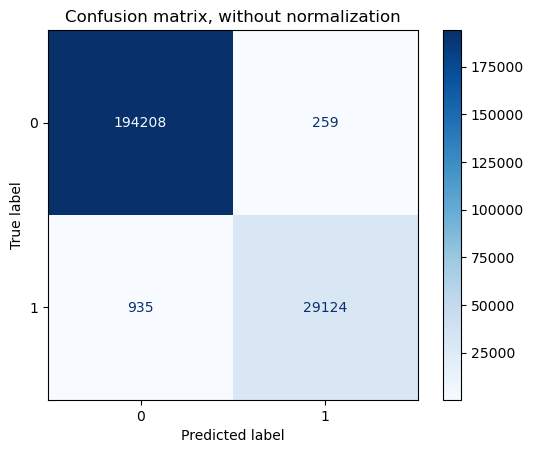

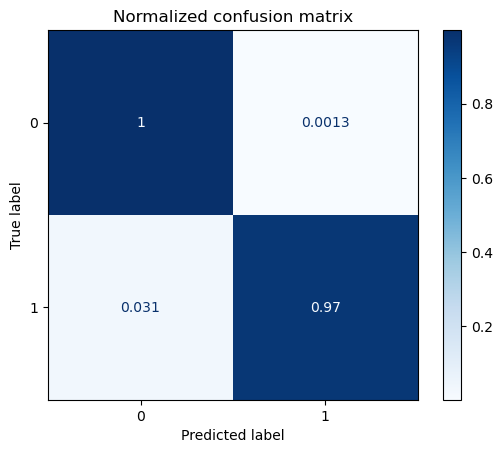

In [42]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

In [43]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    194467
         1.0       0.99      0.97      0.98     30059

    accuracy                           0.99    224526
   macro avg       0.99      0.98      0.99    224526
weighted avg       0.99      0.99      0.99    224526



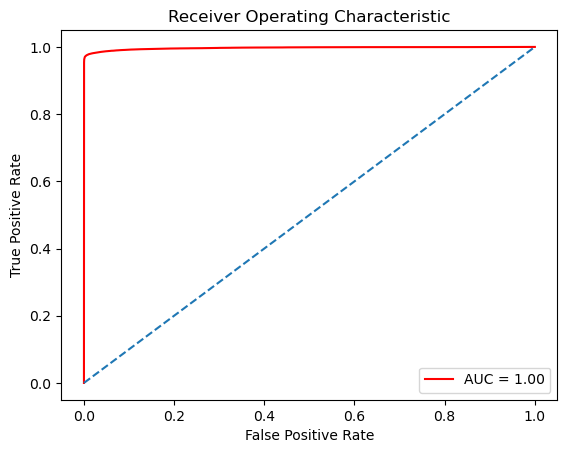

In [44]:
y_pred_prob = model.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

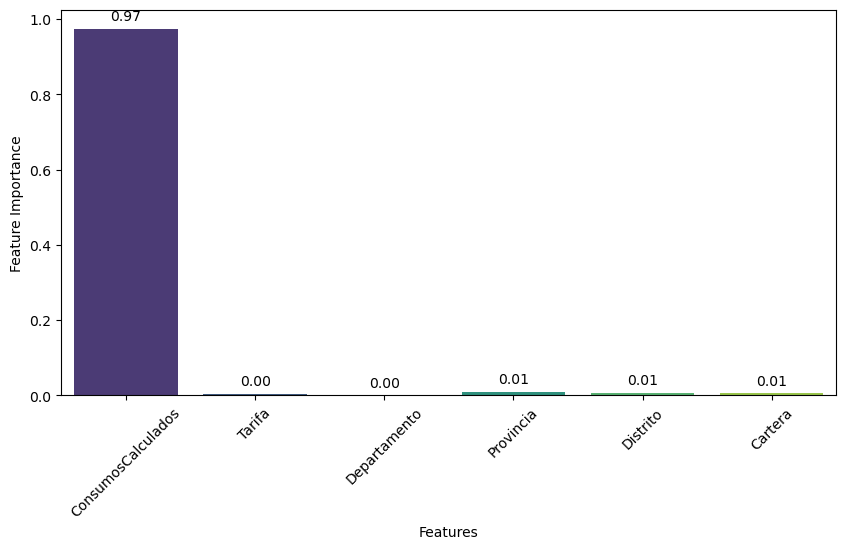

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=X.columns, y=model.feature_importances_, palette='viridis', ax=ax)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.columns

Index(['ConsumosCalculados', 'cluster', 'Tarifa', 'Departamento', 'Provincia',
       'Distrito', 'Cartera'],
      dtype='object')

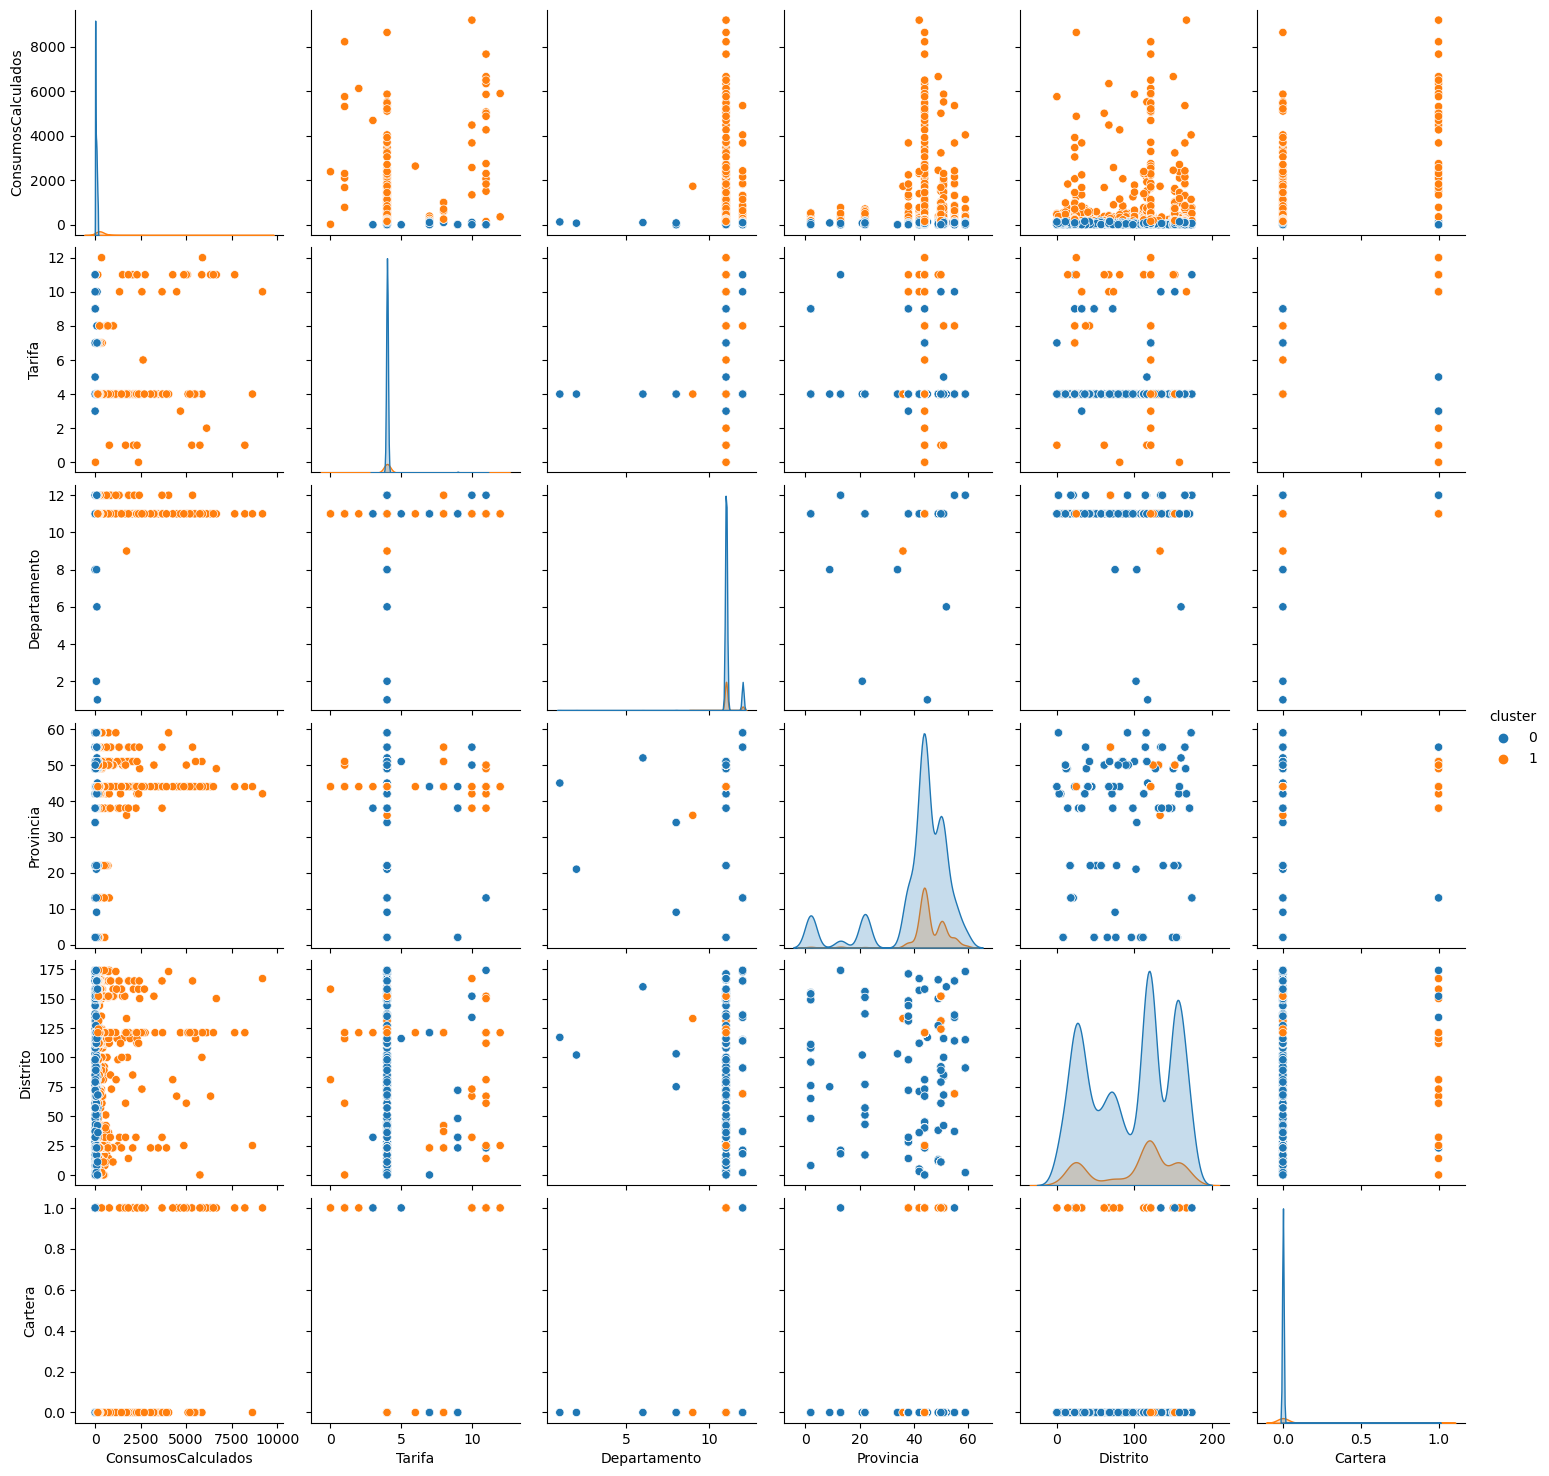

In [47]:
sns.pairplot(df.select_dtypes(include=np.number).sample(10000,random_state=42), diag_kind='kde', hue='cluster')